In [1]:
import pandas as pd
import numpy as np
import math as math

In [2]:
from matplotlib import pyplot as plt

# Import data from csv 

In [6]:
sample_data = pd.read_csv('singleitemSKU88.csv')

# Data exploration

In [7]:
sample_data.describe()

,Week,Price,Price_1,Price_2,St
count,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,0.938462,0.938462,0.938462,287.535540
std,45.177428,0.103151,0.103151,0.103151,167.050466
min,1.000000,0.700000,0.700000,0.700000,66.246844
25%,39.750000,0.900000,0.900000,0.900000,170.425411
50%,78.500000,1.000000,1.000000,1.000000,245.516576
75%,117.250000,1.000000,1.000000,1.000000,344.795118
max,156.000000,1.000000,1.000000,1.000000,923.495591


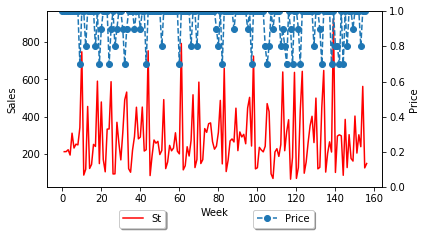

In [8]:
ax1=sample_data.plot(kind='line',x='Week',y='St',color='red')
ax1.set_ylabel('Sales')
ax2 = sample_data['Price'].plot(secondary_y=True,linestyle='dashed',marker='o')
ax2.set_ylabel('Price')
ax2.set_ylim([0,1])

box1 = ax1.get_position()
ax1.set_position([box1.x0, box1.y0 + box1.height * 0.1,
                 box1.width, box1.height * 0.9])
ax1.legend(loc='upper left', bbox_to_anchor=(0.2, -0.10),
          fancybox=True, shadow=True, ncol=5)

box2 = ax2.get_position()
ax2.set_position([box2.x0, box2.y0 + box2.height * 0.1,
                 box2.width, box2.height * 0.9])
ax2.legend(loc='upper left', bbox_to_anchor=(0.6, -0.10),
          fancybox=True, shadow=True, ncol=5)
#ax2.legend(loc='upper left', bbox_to_anchor=(0.6, 0.01),
#          fancybox=True, shadow=True, ncol=5)
plt.savefig('sales_price.png')
plt.show()

# OLS Regression Package

In [9]:
import statsmodels.api as sm

# Add seasonal factor to the data

In [10]:
season =list(range(1,14))
season = np.repeat(season,4)
season = np.append(np.append(season,season),season)
season_dummy = pd.get_dummies(season)
newdata = pd.concat([sample_data,season_dummy], axis = 1, sort = False)
newdata

,Week,Price,Price_1,Price_2,St,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,1.0,1.0,1.0,213.549265,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1.0,1.0,1.0,213.931023,1,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1.0,1.0,1.0,223.924599,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1.0,1.0,1.0,195.420069,1,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1.0,1.0,1.0,312.541057,0,1,0,0,0,0,0,0,0,0,0,0,0
5,6,1.0,1.0,1.0,233.040670,0,1,0,0,0,0,0,0,0,0,0,0,0
6,7,1.0,1.0,1.0,253.631734,0,1,0,0,0,0,0,0,0,0,0,0,0
7,8,1.0,1.0,1.0,249.867687,0,1,0,0,0,0,0,0,0,0,0,0,0
8,9,1.0,1.0,1.0,342.407758,0,0,1,0,0,0,0,0,0,0,0,0,0
9,10,0.7,1.0,1.0,748.315574,0,0,1,0,0,0,0,0,0,0,0,0,0


In [11]:
newdata.to_csv('newdataSKU88.csv')